11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 54s 29ms/step - accuracy: 0.4917 - loss: 1.4512 - val_accuracy: 0.9477 - val_loss: 0.1756
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 81s 28ms/step - accuracy: 0.8426 - loss: 0.5241 - val_accuracy: 0.9651 - val_loss: 0.1174
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 82s 28ms/step - accuracy: 0.8815 - loss: 0.3993 - val_accuracy: 0.9679 - val_loss: 0.1047
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 73s 23ms/step - accuracy: 0.9027 - loss: 0.3385 - val_accuracy: 0.9627 - val_loss: 0.1298
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 33s 22ms/step - accuracy: 0.9123 - loss: 0.3070 - val_accuracy: 0.9728 - val_loss: 0.1004
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 40s 22ms/step - accuracy: 0.9187 - loss: 0.2849 - val_accuracy: 0.9748 - val_loss: 0.0870
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 36s 24ms/step - accuracy: 0.9245 - loss: 0.2669 - val_accuracy: 0.9733 - val_loss: 0.0910
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 41s 24ms/step - accuracy: 0.9298 -

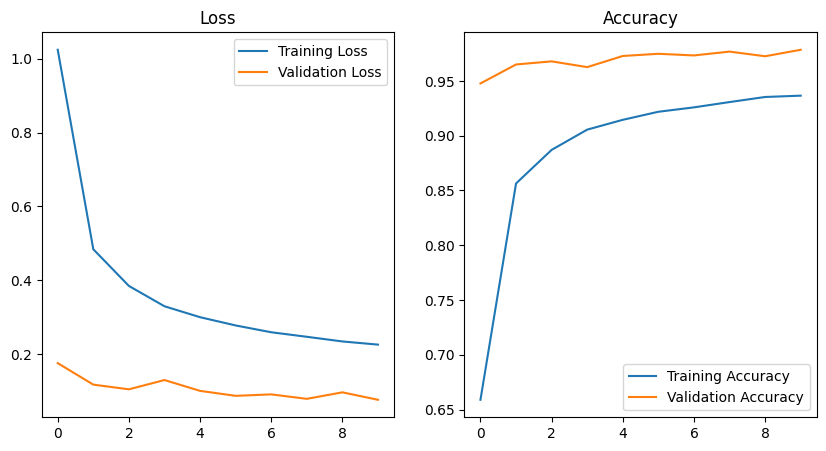

The model is well-fitted.
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9775 - loss: 0.0734
Test accuracy: 0.98


In [1]:
# Import necessary libraries
import tensorflow as tf #TensorFlow is an open-source platform for machine learning developed by Google. Used for buliding ML and DL Models.
from tensorflow import keras #Keras is a high-level deep learning API written in Python that runs on top of TensorFlow.Simplifies the creation of neural networks.
from sklearn.model_selection import train_test_split #Scikit-learn is a Python library for machine learning built on NumPy, SciPy, and matplotlib.
import matplotlib.pyplot as plt

# Load MNIST dataset
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

# Reshape and normalize the data
X_train = X_train.reshape(-1, 28, 28, 1).astype('float32') / 255.0
X_test = X_test.reshape(-1, 28, 28, 1).astype('float32') / 255.0

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Define the LeNet-5 model with Dropout and Data Augmentation
model = keras.models.Sequential([
    keras.layers.RandomRotation(0.1, input_shape=(28, 28, 1)),  # Data augmentation layer
    keras.layers.RandomTranslation(0.1, 0.1),
    keras.layers.RandomZoom(0.1),
    keras.layers.Conv2D(6, (5, 5), activation='relu'), #The `Conv2D` layer in Keras applies filters (small grids of numbers) to an image to detect patterns like edges, textures, or shapes, helping a neural network understand visual features.
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(16, (5, 5), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Flatten(), #The keras.layers.Flatten() layer in Keras is used to transform multi-dimensional inputs (e.g., 2D image data) into a 1D vector.
    keras.layers.Dense(120, activation='relu'), #The keras.layers.Dense layer is a fully connected layer where every neuron in the layer is connected to every neuron in the previous layer, and it is used to learn patterns and relationships in the data.


    keras.layers.Dropout(0.5),  #The Dropout layer in Keras is a regularization technique that randomly sets a fraction of input neurons to zero during training.
    keras.layers.Dense(84, activation='relu'),
    keras.layers.Dropout(0.5),  # Dropout layer
    keras.layers.Dense(10, activation='softmax') #The softmax function is a mathematical function often used in the output layer of neural networks for multi-class classification problems.
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Early Stopping
early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Train the model
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val), callbacks=[early_stopping])

# Plot training and validation loss/accuracy
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1) # This function is used to create multiple subplots within a single figure. The layout of the subplots is specified as (nrows, ncols, index)
plt.plot(history.history['loss'], label='Training Loss')  #This function is used to plot 2D line graphs. It takes x and y values as inputs and has many optional arguments for customization.
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend() # It is a Matplotlib function used to display a legend on a plot, which helps identify the elements of the graph.
plt.title('Loss')
# Validation accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy')

plt.show()

# Check underfitting/overfitting
if history.history['accuracy'][-1] < 0.7: #history.history it is a dictionary containing metrics recorded during training . history['accuracy'] refers to the accuracy values logged for the training data.
    print("The model is underfitting. Consider training for more epochs or using a larger network.")
elif history.history['val_accuracy'][-1] < history.history['accuracy'][-1] - 0.1:
    print("The model is overfitting. Consider using regularization or early stopping.")
else:
    print("The model is well-fitted.")
# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(X_test, y_test) # model.evaluate is the method used to evaluate the model.
print(f'Test accuracy: {test_acc:.2f}')

Saving ML_0.png to ML_0.png
Loading image from: ML_0.png


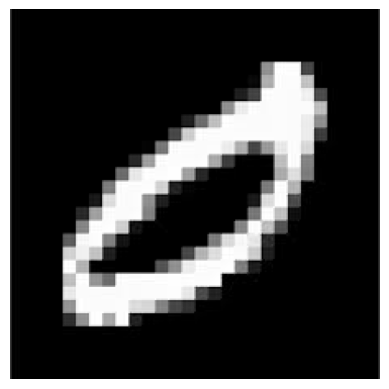

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
Predicted class: 0


Saving ML_9.png to ML_9.png
Loading image from: ML_9.png


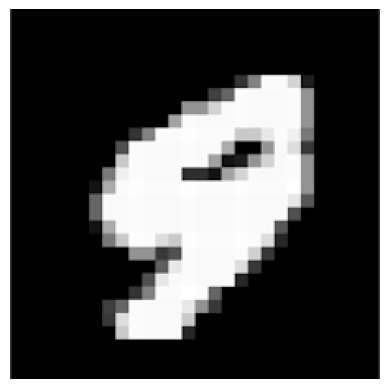

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
Predicted class: 9


Saving ML_6.png to ML_6.png
Loading image from: ML_6.png


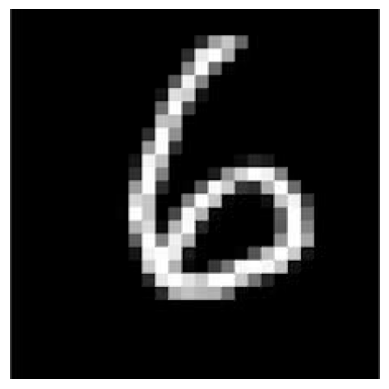

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
Predicted class: 6


In [3]:

from google.colab import files # Used to import files from computer.
import os #The os library in Python is a built-in module used to interact with the operating system. It provides functionalities for handling files, directories, and system-level operations.
import cv2 #The cv2 library, part of OpenCV, is a powerful open-source computer vision library in Python. It is used for image and video processing, including tasks like object detection, image transformations, and face recognition.
import numpy as np
import matplotlib.pyplot as plt

# Function to predict the image
def predict_image(image_path): #The function is designed to load an image, preprocess it, and possibly pass it through a machine learning model to make predictions.
    print(f"Loading image from: {image_path}")

    # Check if the file exists
    if not os.path.exists(image_path):
        print("File does not exist.")
        return

    # Load the image
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE) # cv2.IMREAD_GRAYSCALE Specifies that the image should be read in grayscale mode (1 channel).


    # Check if the image was loaded successfully
    if img is None:
        print("Error loading image. Please check the file format and path.")
        return

    # Display the image
    plt.imshow(img, cmap='gray')
    plt.axis('off')  # Hide axis
    plt.show()  # Show the image

    # Resize the image
    img = cv2.resize(img, (28, 28))
    img = img.reshape(-1, 28, 28, 1).astype('float32') / 255.0

    # Make a prediction (assuming 'model' is defined)
    pred = model.predict(img)
    pred_class = np.argmax(pred, axis=1)

    # Print the prediction
    print(f'Predicted class: {pred_class[0]}')

# Upload the image
uploaded = files.upload()

# Use the uploaded filename
for filename in uploaded.keys():
    predict_image(filename)  # Call the prediction function with the uploaded filenamefrom google.colab import files
    uploaded = files.upload()

# Use the uploaded filename
for filename in uploaded.keys():
    predict_image(filename)

    uploaded = files.upload()

# Use the uploaded filename
for filename in uploaded.keys():
    predict_image(filename)


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step


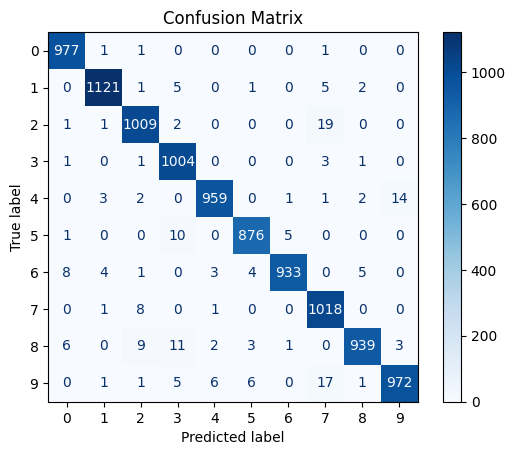

In [5]:
import numpy as np #numpy is a library for numerical computing in Python. It provides powerful tools for working with arrays and matrices.
import matplotlib.pyplot as plt # matplotlib.pyplot is used for creating visualizations like line plots, scatter plots, histograms, and more.
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay #Sklearn  are tools from scikit-learn for evaluating classification models by comparing predicted and actual labels.
 #load_model is used if you have a pre-trained TensorFlow model that you want to use for predictions or evaluation.
from tensorflow.keras.models import load_model  # load_model is used if you have a pre-trained TensorFlow model that you want to use for predictions or evaluation.


# Make predictions on the test set
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)  # Get the predicted class labels

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred_classes)

# Visualize the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm) # ConfusionMatrixDisplay  provides a clean and convenient way to visualize confusion matrices with labels and formatting, making it easier to interpret model performance.
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()